using data https://physionet.org/content/sleep-accel/1.0.0/heart_rate/

In [ ]:
%pip install numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 9.4 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta, datetime


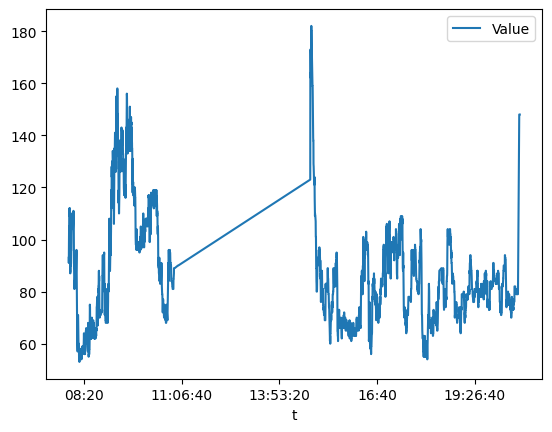

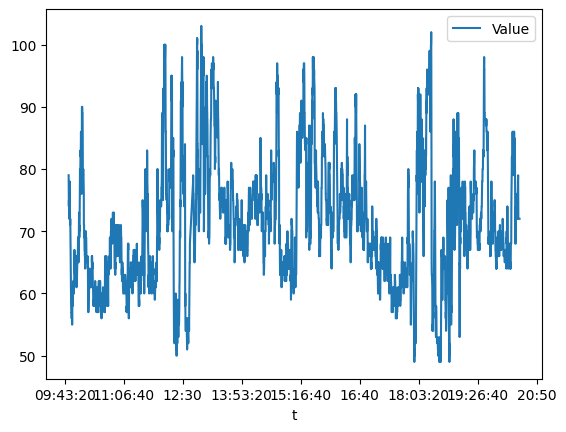

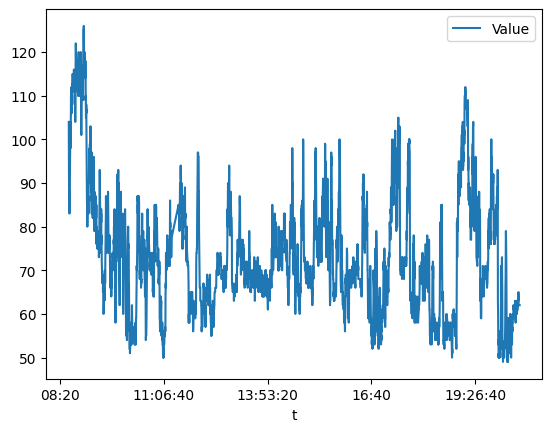

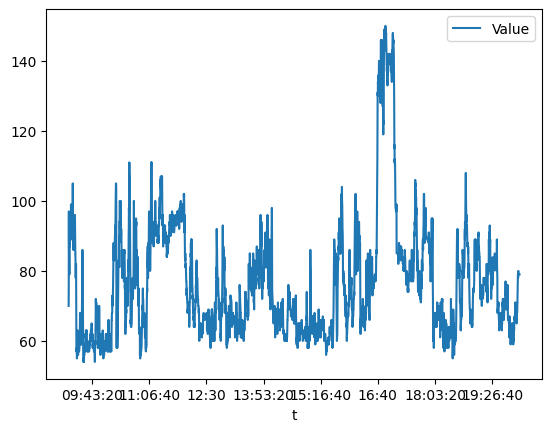

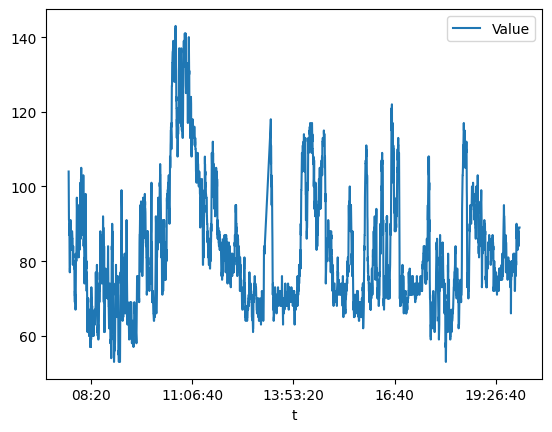

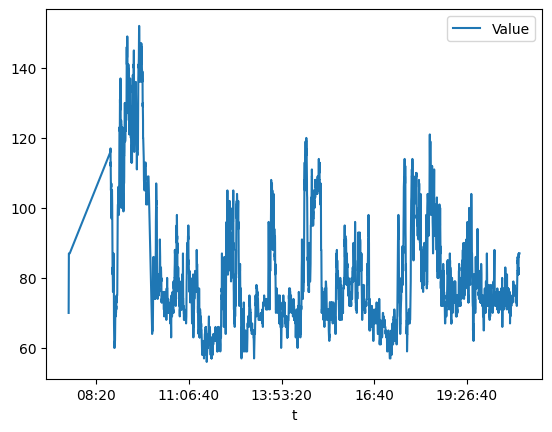

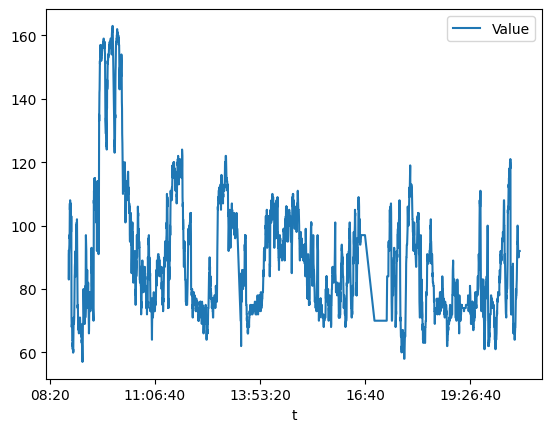

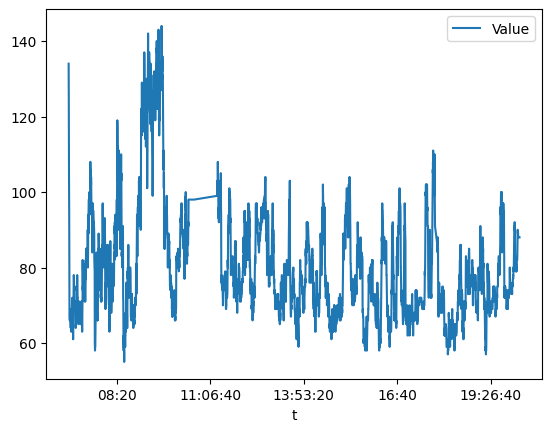

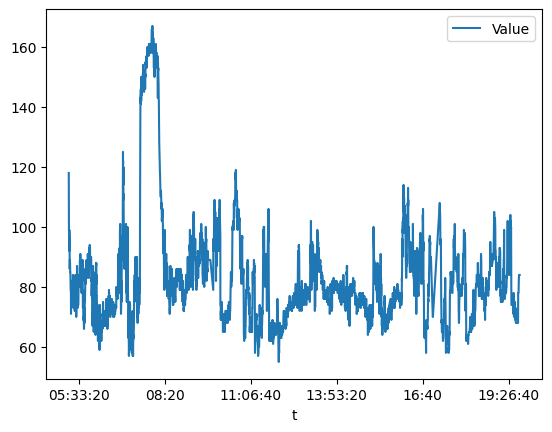

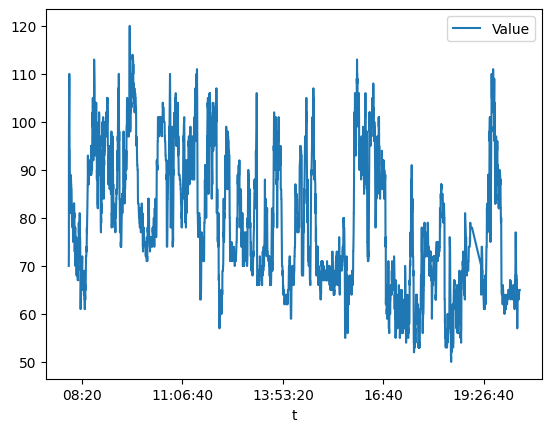

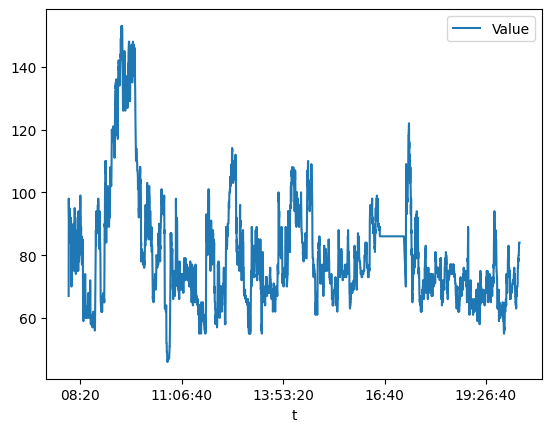

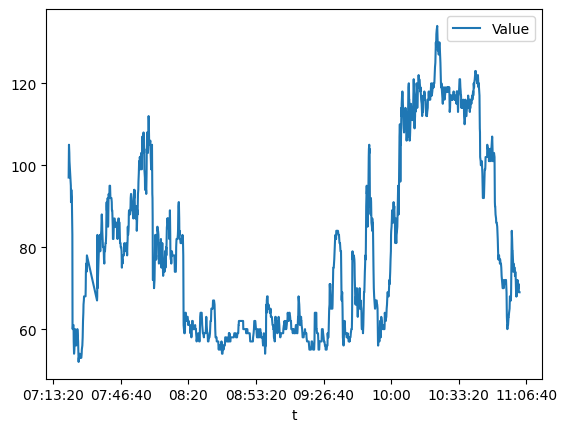

In [3]:
df = pd.read_csv('./data/heartrate_seconds_merged.csv')

df['pyTime'] = pd.to_datetime(df['Time'], format="%m/%d/%Y %I:%M:%S %p")

day_df = df[df['Id'] == 2022484408]

for i in range(1,13):
    d = day_df[day_df['pyTime'].dt.day == i].copy()
    d['t'] = d['pyTime'].dt.time
    d.plot.line(x='t', y='Value')


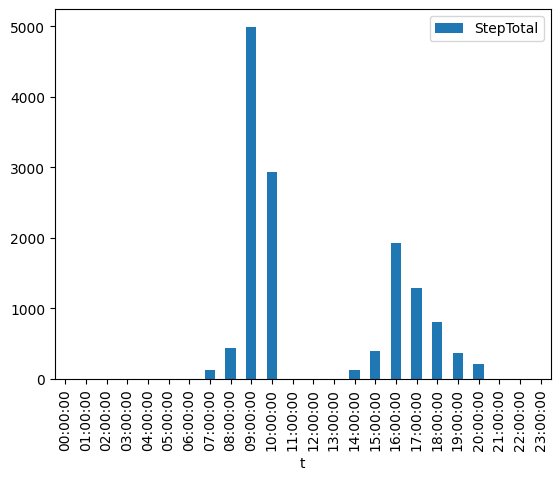

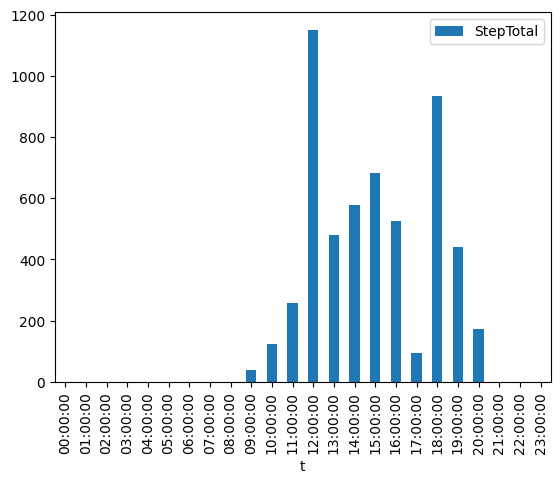

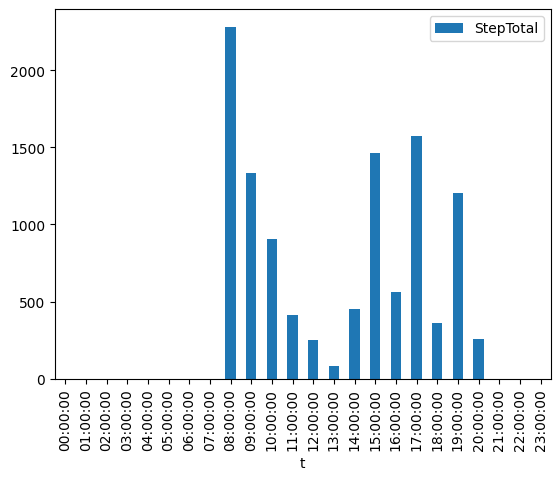

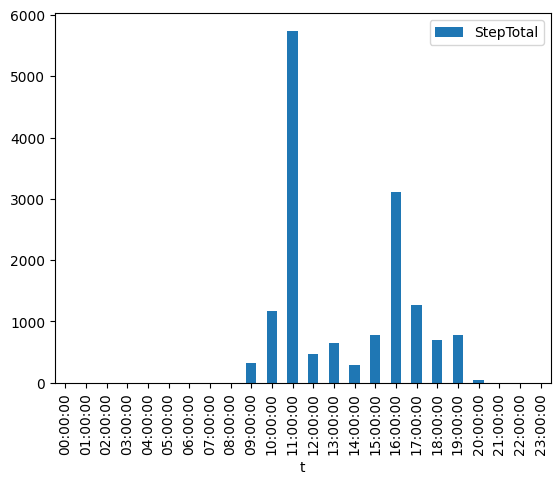

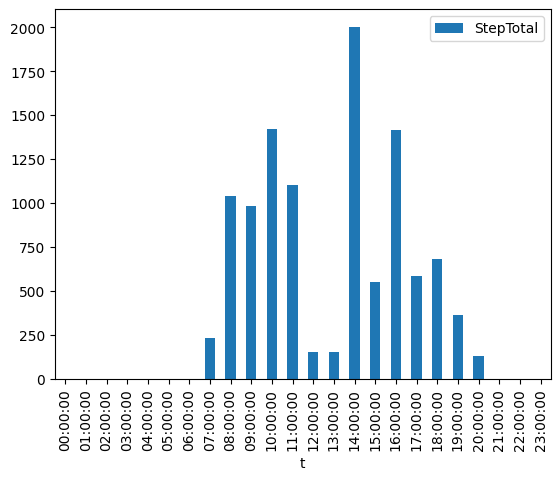

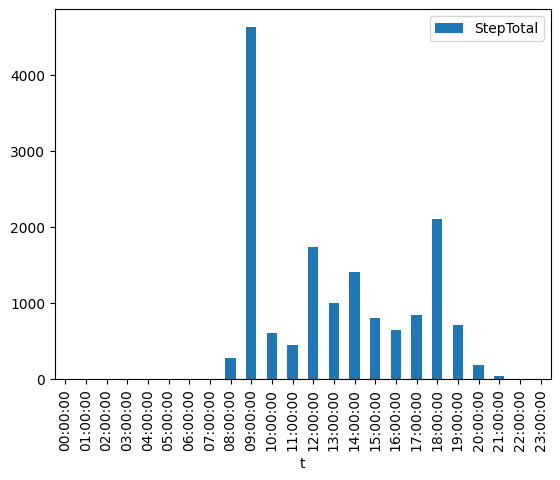

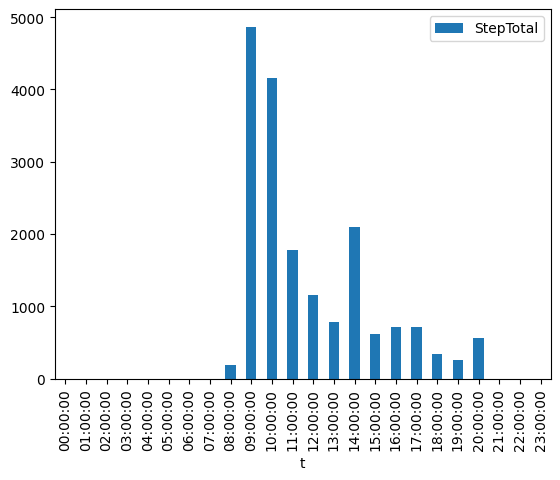

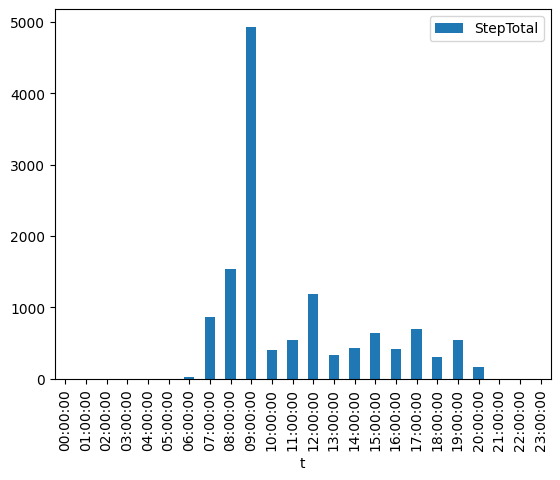

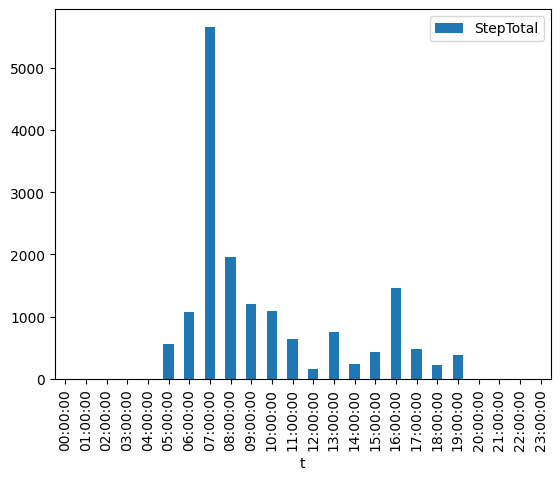

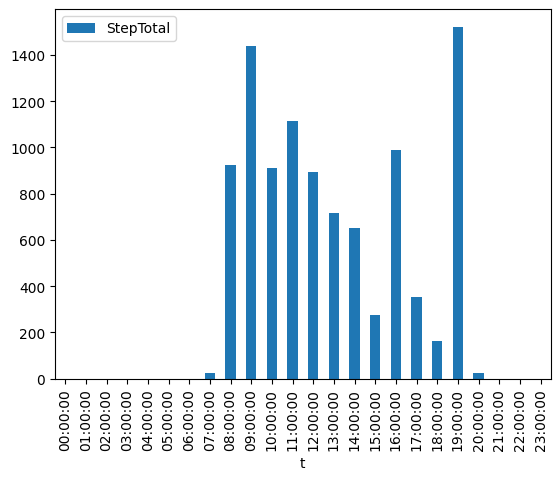

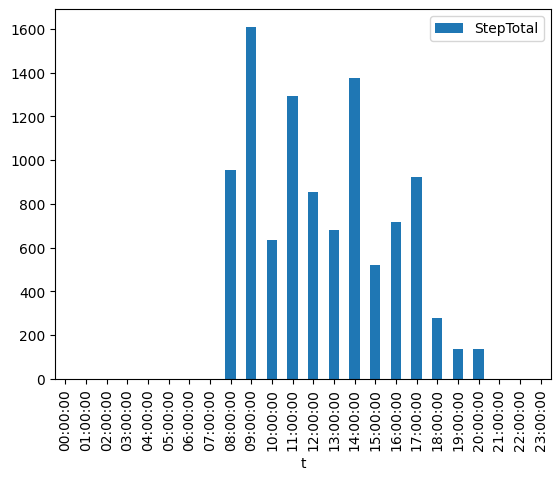

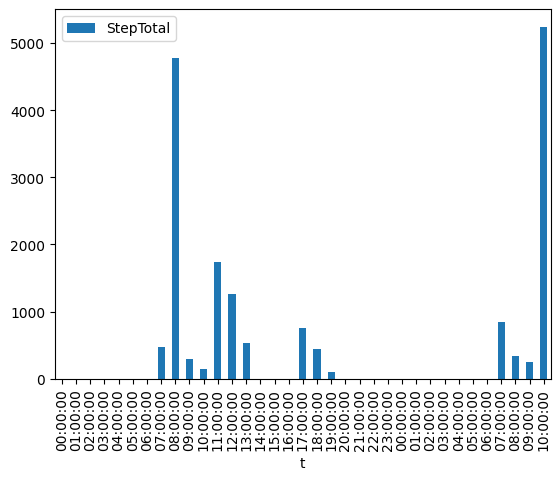

In [5]:
df = pd.read_csv('./data/hourlySteps_merged.csv')

df['pyTime'] = pd.to_datetime(df['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")

day_df = df[df['Id'] == 2022484408]

for i in range(1,13):
    d = day_df[day_df['pyTime'].dt.day == i].copy()
    d['t'] = d['pyTime'].dt.time
    d.plot.bar(x='t', y='StepTotal')
    #d.plot.area